In [1]:
import json
import os
import pandas as pd
import numpy as np
import prettytable as pt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata.csv"


yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 

mdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
mdatadirectory=mdirectory+"/data/marketdata.csv"

marketdata = pd.read_csv(mdatadirectory)
marketdata = marketdata.replace(np.nan, '', regex=True) 

vdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
vdatadirectory=directory+"/data/voldata.csv"

voldata = pd.read_csv(vdatadirectory)
voldata = voldata.replace(np.nan, '', regex=True) 


/opt/homebrew/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
optionDefinition={}
volatility={}
optionDefinition["underlying"]="USD"
optionDefinition["currency"]="TRY"
optionDefinition["callPut"]="Call"
optionDefinition["exerciseType"]="European"
optionDefinition["longShort"]="Long"
optionDefinition["strike"]=7.81
optionDefinition["underlyingPrice"]=7.3406
optionDefinition["processType"]="GeneralizedBS"
optionDefinition["method"]="Analytic"
optionDefinition["calendar"]="Turkey"
optionDefinition["businessDayConvention"]="ModifiedFollowing"
optionDefinition["dayCounter"]="Actual360"
optionDefinition["optionStartDate"]="2021-03-17"
optionDefinition["optionEndDate"]="2021-06-17"
optionDefinition["timeSteps"]=800
optionDefinition["timeGrid"]=10
optionDefinition["contractSize"]=1
optionDefinition["spotAdjustment"]=1
volatility["bidask"]="mid"
volatility["delta"]="25Delta"
volatility["businessDayConvention"]="Following"
optionDefinition["volatility"]=volatility
optionDefinition["interestRate"]="FXTRYZC"
optionDefinition["riskFreeRate"]= "FXUSDZC" 

optionDefinition

{'underlying': 'USD',
 'currency': 'TRY',
 'callPut': 'Call',
 'exerciseType': 'European',
 'longShort': 'Long',
 'strike': 7.81,
 'underlyingPrice': 7.3406,
 'processType': 'GeneralizedBS',
 'method': 'Analytic',
 'calendar': 'Turkey',
 'businessDayConvention': 'ModifiedFollowing',
 'dayCounter': 'Actual360',
 'optionStartDate': '2021-03-17',
 'optionEndDate': '2021-06-17',
 'timeSteps': 800,
 'timeGrid': 10,
 'contractSize': 1,
 'spotAdjustment': 1,
 'volatility': {'bidask': 'mid',
  'delta': '25Delta',
  'businessDayConvention': 'Following'},
 'interestRate': 'FXTRYZC',
 'riskFreeRate': 'FXUSDZC'}

In [3]:
instruments={}
depo={}

depo["businessDayConvention"]="ModifiedFollowing"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                        # if it is null, default value is used

instruments["DEPO"]=depo

instruments

{'DEPO': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Actual360'}}

In [4]:
interestRate={
      "name": "FXTRYZC",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "TRY",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments
    }
interestRate

{'name': 'FXTRYZC',
 'settlementDays': 2,
 'intpMethod': 'LINEAR',
 'currency': 'TRY',
 'calendar': 'Turkey',
 'dayCounter': 'Actual360',
 'period': '6M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'}}}

In [5]:
 riskFreeRate= {
      "name": "FXUSDZC",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "USD",
      "calendar": "UnitedStates",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments":instruments
    }
riskFreeRate

{'name': 'FXUSDZC',
 'settlementDays': 2,
 'intpMethod': 'LINEAR',
 'currency': 'USD',
 'calendar': 'UnitedStates',
 'dayCounter': 'Actual360',
 'period': '6M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'}}}

In [6]:
riskdata = {
  "id": "PORTFOLIO1",
  "name": "PORTFOLIO 1",
  "method": "VaR",
  "forRisk": True,
  "valuationDate": "2021-01-28",
  "valuationCurrency": "USD",
  "riskMethod": "DELTANORMAL",
  "horizon": 252,
  "confidenceInterval": 0.99,
  "returnType": None,
  "trend": False,
  "calendar": "Turkey",
  "timeBucket": ["0D","1D","1W","2W","3W","1M","2M","3M","6M","9M","1Y","2Y","3Y","4Y",
                "5Y","6Y","7Y","8Y","9Y","10Y","12Y","15Y","20Y","25Y","30Y","40Y","50Y"],
  "fillNa": "BACKWARD",
  "maxFillNaDays": 5,
  "tasks": [
            {
      "trade_id": "VOP1001",
      "calculation_type": "vanilla_option",
      "settlementDate": "2021-02-01",
      "maturityDate": "2021-06-28",
      "notional": 1000000,
      "optionDefinition": optionDefinition
    }
  ],
  "curves":  [interestRate,riskFreeRate],
  "yieldData": yielddata.to_dict('r'),
  "volatilityData": voldata.to_dict('r'),
  "marketData":marketdata.to_dict('r'),
}

In [7]:
try:
    res = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(res["result"]):
      result=json.loads(res["result"])
    else:
      print(res["result"])
except RhoovaError as e:
    e.printPretty()

In [8]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['VAR', result.get('VaR')])
npvTable.add_row(['VAR/PV (%)', result.get('var/pv')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)


+------------+------------+
| Parameters |      Value |
+------------+------------+
|         PV | 23687.9736 |
|        VAR | 35018.7264 |
| VAR/PV (%) |   147.8334 |
+------------+------------+


In [9]:
forDVO1_1=pd.DataFrame(result.get("forDV01").get("FXTRYZC"))
forDVO1_2=pd.DataFrame(result.get("forDV01").get("FXUSDZC"))
forDVO1=pd.concat([forDVO1_1,forDVO1_2])
forDVO1

,bin,cashflow,rate,timeToMatByYear
0,FXTRYZC0D,0.000000e+00,0.001208,0.000000
1,FXTRYZC1D,0.000000e+00,0.001208,0.002778
2,FXTRYZC1W,0.000000e+00,0.001208,0.019444
3,FXTRYZC2W,0.000000e+00,0.001208,0.038889
4,FXTRYZC3W,0.000000e+00,0.001208,0.058333
5,FXTRYZC1M,0.000000e+00,0.001208,0.077778
6,FXTRYZC2M,0.000000e+00,0.001585,0.163889
7,FXTRYZC3M,4.892884e+05,0.002114,0.252778
8,FXTRYZC6M,4.999879e+05,0.002275,0.505556
9,FXTRYZC9M,0.000000e+00,0.002693,0.758333


In [11]:
portfoliocorr=result.get("riskFactorsCorr")
pd.DataFrame(portfoliocorr)

,FXTRYZC0D,FXTRYZC1D,FXTRYZC1W,FXTRYZC2W,FXTRYZC3W,FXTRYZC1M,FXTRYZC2M,FXTRYZC3M,FXTRYZC6M,FXTRYZC9M,...,FXUSDZC10Y,FXUSDZC12Y,FXUSDZC15Y,FXUSDZC20Y,FXUSDZC25Y,FXUSDZC30Y,FXUSDZC40Y,FXUSDZC50Y,USDTRY,USDTRYVol
FXTRYZC0D,1,1,1.0,1.0,1,0.99807,0.691076,0.562359,0.505207,0.54431,...,0.212101,0.207916,0.203787,0.199714,0.197298,0.195697,0.193708,0.192521,0.00104,NaN
FXTRYZC1D,1,1,1.0,1.0,1.0,0.99807,0.691076,0.562359,0.505207,0.54431,...,0.212101,0.207916,0.203787,0.199714,0.197298,0.195697,0.193708,0.192521,0.00104,NaN
FXTRYZC1W,1.0,1.0,1,1.0,1.0,0.99807,0.691076,0.562359,0.505207,0.54431,...,0.212101,0.207916,0.203787,0.199714,0.197298,0.195697,0.193708,0.192521,0.00104,NaN
FXTRYZC2W,1.0,1.0,1.0,1,1.0,0.99807,0.691076,0.562359,0.505207,0.54431,...,0.212101,0.207916,0.203787,0.199714,0.197298,0.195697,0.193708,0.192521,0.00104,NaN
FXTRYZC3W,1,1.0,1.0,1.0,1,0.99807,0.691076,0.562359,0.505207,0.54431,...,0.212101,0.207916,0.203787,0.199714,0.197298,0.195697,0.193708,0.192521,0.00104,NaN
FXTRYZC1M,0.99807,0.99807,0.99807,0.99807,0.99807,1,0.690129,0.560085,0.504637,0.543529,...,0.210989,0.20681,0.202687,0.19862,0.196208,0.19461,0.192624,0.191439,-0.001812,NaN
FXTRYZC2M,0.691076,0.691076,0.691076,0.691076,0.691076,0.690129,1,0.659742,0.545602,0.605061,...,0.291897,0.287641,0.28342,0.279264,0.276796,0.275162,0.273132,0.271919,0.024147,NaN
FXTRYZC3M,0.562359,0.562359,0.562359,0.562359,0.562359,0.560085,0.659742,1,0.595017,0.62932,...,0.214921,0.209978,0.205085,0.20027,0.197413,0.195525,0.193181,0.191781,-0.036721,NaN
FXTRYZC6M,0.505207,0.505207,0.505207,0.505207,0.505207,0.504637,0.545602,0.595017,1,0.923647,...,0.116407,0.109703,0.103105,0.096637,0.092821,0.0903,0.087181,0.085322,0.029189,NaN
FXTRYZC9M,0.54431,0.54431,0.54431,0.54431,0.54431,0.543529,0.605061,0.62932,0.923647,1,...,0.444242,0.437326,0.430493,0.423742,0.419736,0.417082,0.413786,0.411818,0.053682,NaN


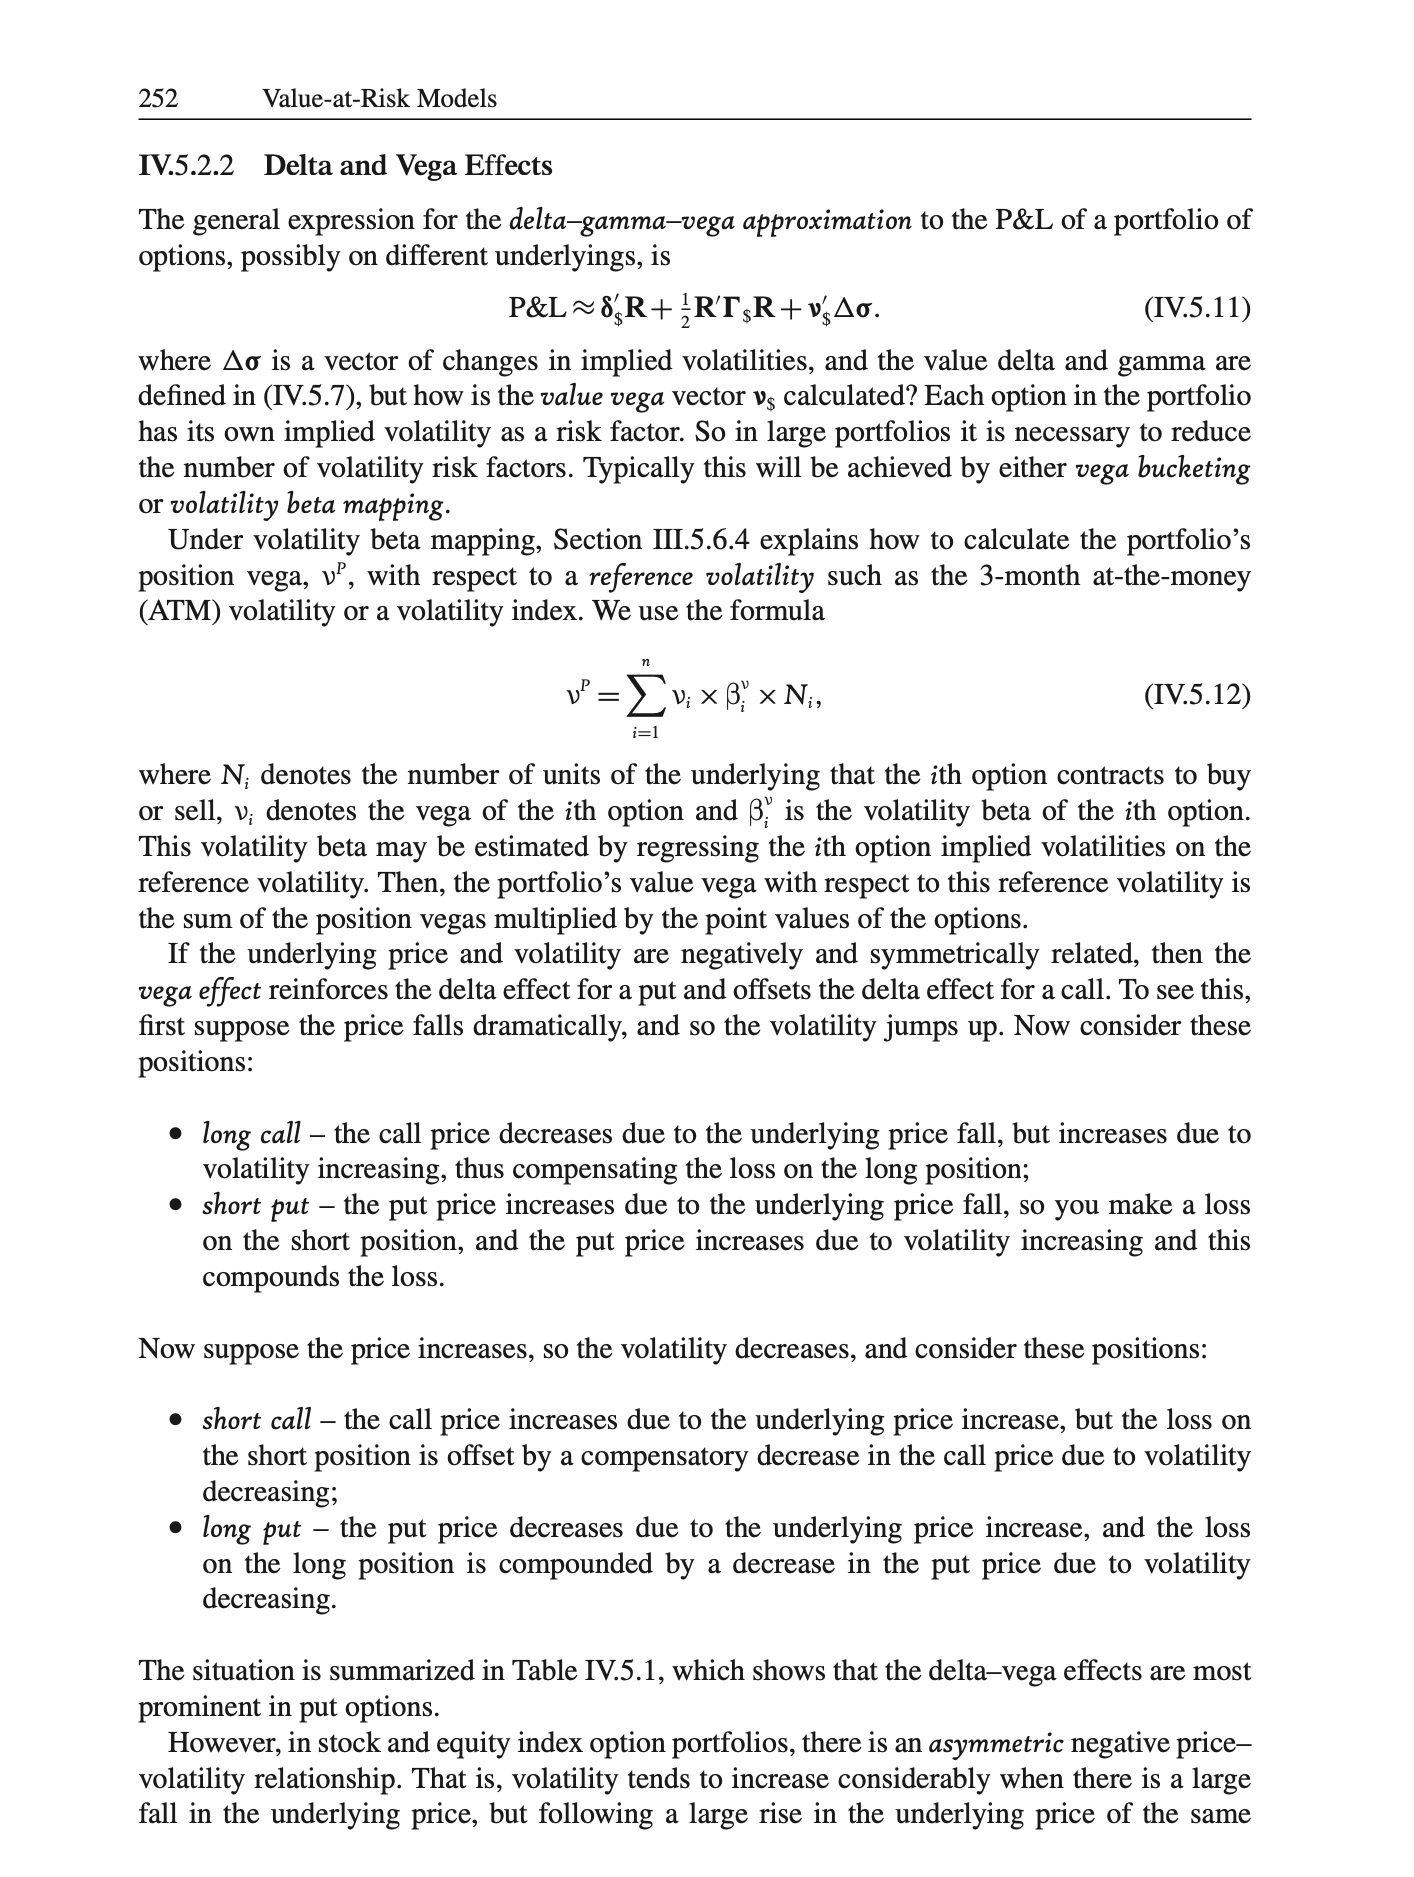

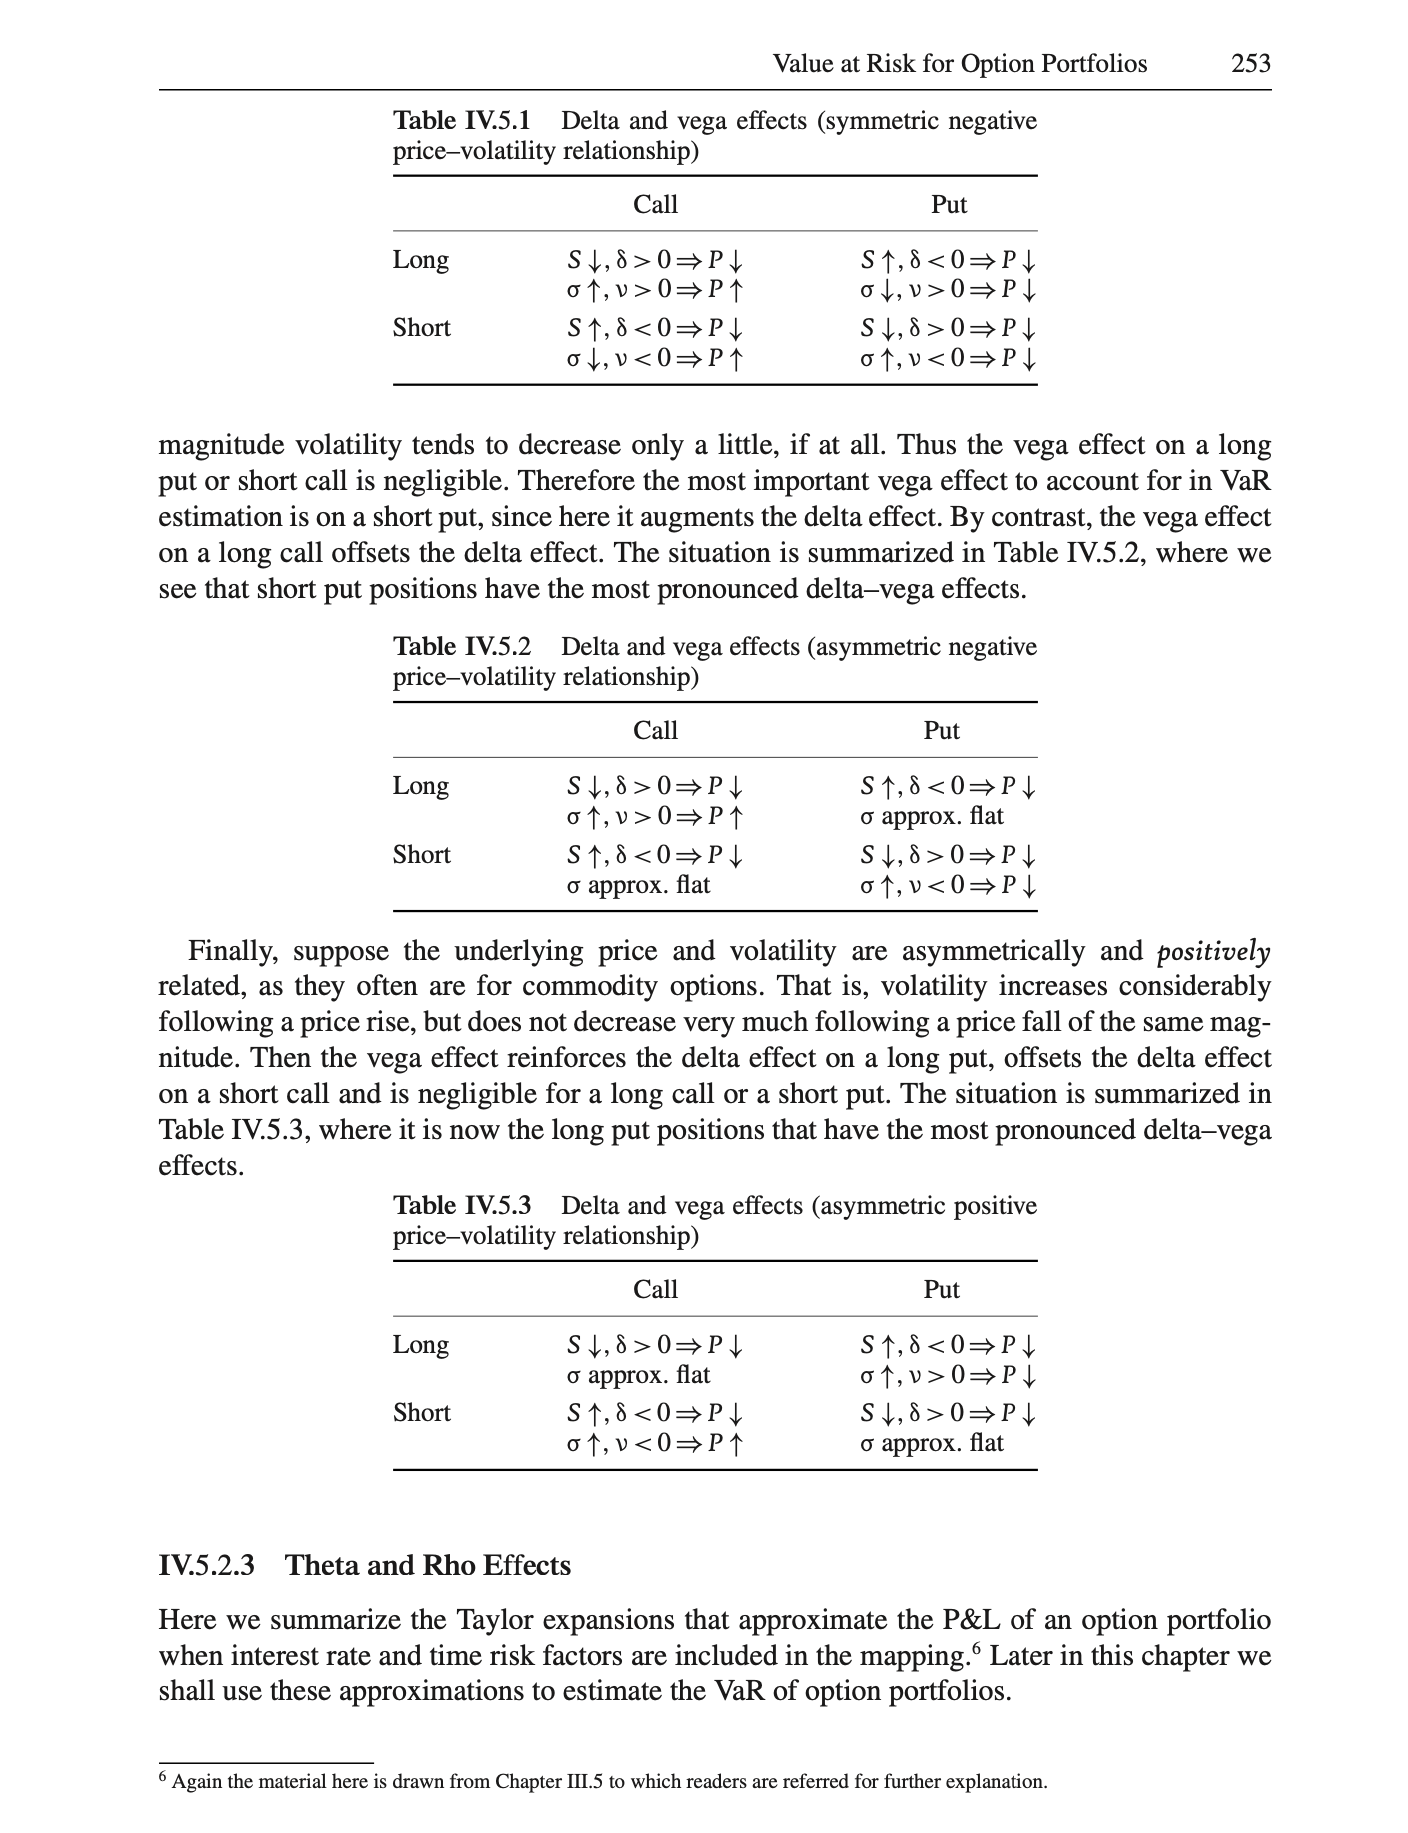

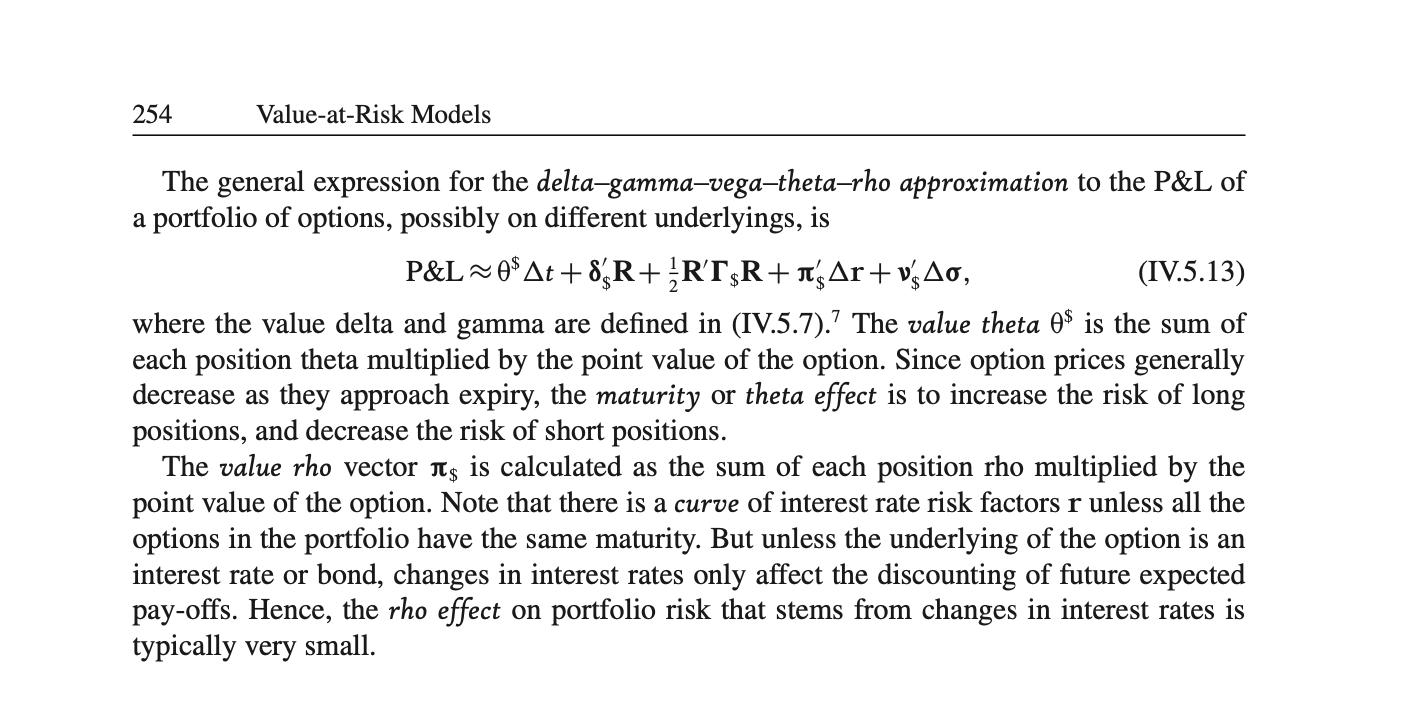

In [ ]:
# Market Risk Analysis Volume IV
#Value-at-Risk Models
#Carol Alexander
#Page (252)